In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset as a dataframe. There are 2 csv files:- train and test.

fashion_train = pd.read_csv('fashion-mnist_train.csv')
fashion_test = pd.read_csv('fashion-mnist_test.csv')

In [3]:
'''
Visualizing the data. There are 785 columns in total:- 784 pixel value columns and 1 label column. There are 784 features.
The pixel values range from 0-255.
'''

fashion_test.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


In [4]:
'''
Creating validation dataset. We are splitting the train data using train_test_split with a split size of 0.16666 to get exactly
10,000 validation samples.
'''

x = fashion_train.drop('label', axis=1)
y = fashion_train['label']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.16666, random_state=42)

x_test = fashion_test.drop('label', axis=1)
y_test = fashion_test['label']

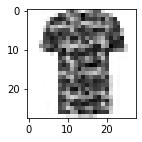

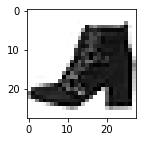

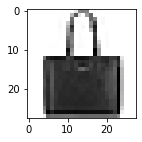

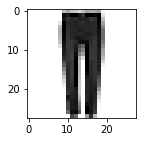

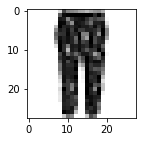

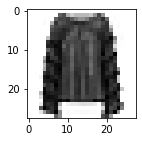

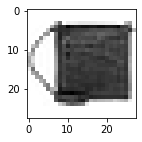

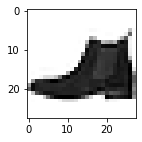

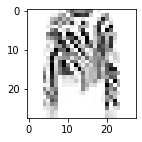

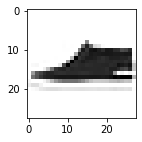

In [5]:
'''
Displaying a few images. We are padding the pixel data into a 28x28 array and then using imshow() function from matplotlib to
plot the image. We are displaying 10 random images from the train dataset.
'''

disp_index = [3,42,658,991,5632,10003,15111,23807,45666,49994]

for m in disp_index:
    img_data = []
    k = []
    cnt = 1
    for z in x_train.loc[m]:
        if(int(cnt)%28 == 0):
            k.append(z)
            img_data.append(k)
            cnt+=1
            k=[]
        else:
            k.append(z)
            cnt+=1
    plt.figure(figsize=(2, 2))
    plt.imshow(img_data, cmap=plt.cm.binary)
    plt.show()

# Multinomial Logistic Regression (Softmax Regression)

In [20]:
'''
We will be changing the values of 3 hyper-parameters:- penalty, max_iter and C, to see the impact of the hyperparameters.
'''

penalty = ['none', 'l2']
max_iter = [100, 500, 1000]
C = [0.001, 1.0, 100.0]

for a in penalty:
    for b in max_iter:
        for c in C:
            model_1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty=a, max_iter=b, C=c)
            model_1.fit(x_train, y_train)
            y_pred_train = model_1.predict(x_train)
            accuracy_train = accuracy_score(y_train, y_pred_train)
            y_pred_val = model_1.predict(x_val)
            accuracy_val = accuracy_score(y_val, y_pred_val)
            y_pred_test = model_1.predict(x_test)
            accuracy_test = accuracy_score(y_test, y_pred_test)
            print("Model with penalty =",a,"max_iter =",b,"C =",c)
            print("Train Accuracy:", accuracy_train, "Validation Accuracy:", accuracy_val, "Test Accuracy:", accuracy_test)
            print("\n")

Model with penalty = none max_iter = 100 C = 0.001
Train Accuracy: 0.86424 Validation Accuracy: 0.8468 Test Accuracy: 0.8499


Model with penalty = none max_iter = 100 C = 1.0
Train Accuracy: 0.86424 Validation Accuracy: 0.8468 Test Accuracy: 0.8499


Model with penalty = none max_iter = 100 C = 100.0
Train Accuracy: 0.86424 Validation Accuracy: 0.8468 Test Accuracy: 0.8499


Model with penalty = none max_iter = 500 C = 0.001
Train Accuracy: 0.8799 Validation Accuracy: 0.8374 Test Accuracy: 0.8414


Model with penalty = none max_iter = 500 C = 1.0
Train Accuracy: 0.8799 Validation Accuracy: 0.8374 Test Accuracy: 0.8414


Model with penalty = none max_iter = 500 C = 100.0
Train Accuracy: 0.8799 Validation Accuracy: 0.8374 Test Accuracy: 0.8414


Model with penalty = none max_iter = 1000 C = 0.001
Train Accuracy: 0.88462 Validation Accuracy: 0.8349 Test Accuracy: 0.8375


Model with penalty = none max_iter = 1000 C = 1.0
Train Accuracy: 0.88462 Validation Accuracy: 0.8349 Test Accuracy: 

#### Discussion: We created a logistic regression model which can handle mutinomial class and uses solver 'lbfgs'. Solver 'lbfgs' implements the softmax regression. In order to analyze the effect of hyperparameters on the model, we chose 3 such hyperparameters to tune. For the penalty hyperparameter, we took 'none' and 'l2' penalties. 'l1' penalty is not compatible with 'lbfgs' solver. For the max_iter hyperparameter, we took values of 100, 500, 1000. max_iter defines the maximum number of iterations taken by the model to converge. Then for our last hyperparameter C, we took values of 0.001, 1.0 and 100.0. C is known as the regularization factor. It controls how strong the regularization will be on the data.

#### Let us now try to analyze the results. Straight off, we can say the penalty terms of 'none' and 'l2' donot have a huge impact on the output of the model as accuracy scores are very similar. max_iter is an effective hyperparameter, but only upto a certain point. Increase in accuracy due to increasing number of iterations saturates after a point. C plays an integral role. For small values like 0.001, the model seems to be underfitting. Again for large values of C like 100, the model overfits a bit. The best outputs are given when penalty=l2 and max_iter=100. The train accuracies are upwards of 0.86, the validation accuracies are upwards of 0.84 and test accuracies are upwards of 0.85. Overall, the best model seems to be the one with penalty='l2', max_iter=100, and C=100.0, which achieves a test accuracy of 0.8525. 

# Support Vector Machines

In [6]:
kernel = ['linear','rbf', 'poly']
C = [0.001, 1.0, 100.0]
gamma = ['scale','auto']

batch_size = 10000
num_batches = int(x_train.shape[0] / batch_size)

for a in kernel:
    for b in C:
        for c in gamma:
            model_2 = SVC(kernel=a, C=b, gamma=c)
            for i in range(num_batches):
                batch_x = x_train[i*batch_size:(i+1)*batch_size]
                batch_y = y_train[i*batch_size:(i+1)*batch_size]
                model_2.fit(batch_x, batch_y)
            y_pred_train = model_2.predict(x_train)
            accuracy_train = accuracy_score(y_train, y_pred_train)
            y_pred_val = model_2.predict(x_val)
            accuracy_val = accuracy_score(y_val, y_pred_val)
            y_pred_test = model_2.predict(x_test)
            accuracy_test = accuracy_score(y_test, y_pred_test)
            print("Model with kernel =",a,"C =",b,"gamma =",c)
            print("Train Accuracy:", accuracy_train, "Validation Accuracy:", accuracy_val, "Test Accuracy:", accuracy_test)
            print("\n")
    
    

Model with kernel = linear C = 0.001 gamma = scale
Train Accuracy: 0.83632 Validation Accuracy: 0.7953 Test Accuracy: 0.8039


Model with kernel = linear C = 0.001 gamma = auto
Train Accuracy: 0.83632 Validation Accuracy: 0.7953 Test Accuracy: 0.8039


Model with kernel = linear C = 1.0 gamma = scale
Train Accuracy: 0.8358 Validation Accuracy: 0.7945 Test Accuracy: 0.8048


Model with kernel = linear C = 1.0 gamma = auto
Train Accuracy: 0.8358 Validation Accuracy: 0.7945 Test Accuracy: 0.8048


Model with kernel = linear C = 100.0 gamma = scale
Train Accuracy: 0.8358 Validation Accuracy: 0.7945 Test Accuracy: 0.8048


Model with kernel = linear C = 100.0 gamma = auto
Train Accuracy: 0.8358 Validation Accuracy: 0.7945 Test Accuracy: 0.8048


Model with kernel = rbf C = 0.001 gamma = scale
Train Accuracy: 0.09936 Validation Accuracy: 0.1032 Test Accuracy: 0.1


Model with kernel = rbf C = 0.001 gamma = auto
Train Accuracy: 0.09936 Validation Accuracy: 0.1032 Test Accuracy: 0.1


Model wi

#### Discussion: We created a support vector classifier with different kernels, C and gamma. The kernel is a function that takes two input data points and outputs their similarity or distance measure in a higher-dimensional feature space. C is the regularization parameter, and gamma is the kernel coefficient for the kernel. We are considering 'linear', 'rbf' and 'poly' kernels. For C we are considering 0.001, 1 and 100. For gamma we are considering 'scale' and 'auto'. If gamma='scale', then it uses 1 / (number_of_features * X.var()) as value of gamma. If ‘auto’, it uses 1 / number_of_features.

#### Let us now try to analyze the results. Linear kernel produces relatively lower accuracies compared to other kernels. The values of C and gamma donot affect the accuracies much when kernel is linear. rbf kernels produce the best results out of the 3 kernels, especially when C = 100.0 and gamma = scale. However, when gamma = auto, the accuracies of RBF kernel models decrease significantly. poly kernel works better than linear, but worse than rbf. In conclusion, the RBF kernel with C = 100.0 and gamma = scale is the best combination for this particular dataset. It gives the highest accuracy on both validation and test sets.  

# Random Forest Classifier

In [22]:
'''
We will be changing the values of 3 hyper-parameters:- n_estimators, max_depth and min_samples_split, to see the impact of the hyperparameters.
'''

n_estimators = [10, 50, 100]
max_depth = [5, 10, 20]
min_samples_split = [2, 5, 10]

for a in n_estimators:
    for b in max_depth:
        for c in min_samples_split:
            model_3 = RandomForestClassifier(n_estimators=a, max_depth=b, min_samples_split=c)
            model_3.fit(x_train, y_train)
            y_pred_train = model_3.predict(x_train)
            accuracy_train = accuracy_score(y_train, y_pred_train)
            y_pred_val = model_3.predict(x_val)
            accuracy_val = accuracy_score(y_val, y_pred_val)
            y_pred_test = model_3.predict(x_test)
            accuracy_test = accuracy_score(y_test, y_pred_test)
            print("Model with n_estimators =",a,"max_depth =",b,"min_samples_split =",c)
            print("Train Accuracy:", accuracy_train, "Validation Accuracy:", accuracy_val, "Test Accuracy:", accuracy_test)
            print("\n")

Model with n_estimators = 10 max_depth = 5 min_samples_split = 2
Train Accuracy: 0.8836 Validation Accuracy: 0.7532 Test Accuracy: 0.7523


Model with n_estimators = 10 max_depth = 5 min_samples_split = 5
Train Accuracy: 0.8836 Validation Accuracy: 0.7512 Test Accuracy: 0.7504


Model with n_estimators = 10 max_depth = 5 min_samples_split = 10
Train Accuracy: 0.8836 Validation Accuracy: 0.7652 Test Accuracy: 0.759


Model with n_estimators = 10 max_depth = 10 min_samples_split = 2
Train Accuracy: 0.8836 Validation Accuracy: 0.8386 Test Accuracy: 0.8444


Model with n_estimators = 10 max_depth = 10 min_samples_split = 5
Train Accuracy: 0.8836 Validation Accuracy: 0.8398 Test Accuracy: 0.8422


Model with n_estimators = 10 max_depth = 10 min_samples_split = 10
Train Accuracy: 0.8836 Validation Accuracy: 0.8351 Test Accuracy: 0.8382


Model with n_estimators = 10 max_depth = 20 min_samples_split = 2
Train Accuracy: 0.8836 Validation Accuracy: 0.8526 Test Accuracy: 0.8603


Model with n_es

#### Discussion: We created a random forest classifier with 3 hyperparameters:- n_estimators, max_depth and min_samples_split. n_estimators controls the number of decision trees to be used in the model, max_depth is the maximum depth of the tree and min_samples_split is the minimum number of samples required to split an internal node. For n_estimators, we took the values of 10, 50 and 100. For max_depth, we considered 5, 10 and 20. For min_samples_split, we considered 2,5,10.

#### Let us now try to analyze the results. The outputs show the accuracy scores with varying hyperparameters on the training, validation, and test sets. Looking at the results, we can see that the models with higher max_depth and lower min_samples_split tend to have better accuracy scores. This is expected, as higher max_depth allows the model to capture more complex, intricate relationships in the data, while lower min_samples_split means that the model can make splits even with a small number of samples, which allows it to capture more intricacies from various samples of the data. Increasing the number of estimators also increases accuracy score, although the improvement is not very significant and stagnates after a certain point. The best outputs are given when n_estimators=100 and max_depth=20. The train accuracies are upwards of 0.88, the validation accuracies are upwards of 0.87 and test accuracies are upwards of 0.87. The best-performing model appears to be the one with 100 estimators, max_depth of 20, and min_samples_split of 5, which achieved a test accuracy score of 0.8808.

In [11]:
'''
Feature importance analysis using in-built function for random forest. From this, we can find out the features which are most
impacting and features which have the least influence on the model.
'''

clf_rf = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5)
clf_rf.fit(x_train, y_train)
feature_importance = dict(zip(x_train.columns, clf_rf.feature_importances_))
for x in feature_importance:
    print(x,":",feature_importance[x],"\n")

pixel1 : 1.2145654333160257e-06 

pixel2 : 3.963404464205739e-06 

pixel3 : 1.9351057883104402e-05 

pixel4 : 3.329654468398995e-05 

pixel5 : 8.886086497993207e-05 

pixel6 : 0.0001068189168549498 

pixel7 : 0.0002555895296810492 

pixel8 : 0.00028016299718071645 

pixel9 : 0.00040777752165653157 

pixel10 : 0.0007138073615210555 

pixel11 : 0.002078901639571814 

pixel12 : 0.0009882115051134544 

pixel13 : 0.0011885919143530346 

pixel14 : 0.0016194686318599342 

pixel15 : 0.0018747303796711834 

pixel16 : 0.001500595162043744 

pixel17 : 0.0008161502437984175 

pixel18 : 0.0015005735857213716 

pixel19 : 0.0011801762403989935 

pixel20 : 0.00044433323808051975 

pixel21 : 0.00039809236742889336 

pixel22 : 0.00035843469363759596 

pixel23 : 0.00017407103422862255 

pixel24 : 8.101257791957072e-05 

pixel25 : 5.143442284281001e-05 

pixel26 : 2.3167199047222125e-05 

pixel27 : 4.313802226872497e-06 

pixel28 : 0.0 

pixel29 : 0.0 

pixel30 : 2.450023970616733e-06 

pixel31 : 1.770776

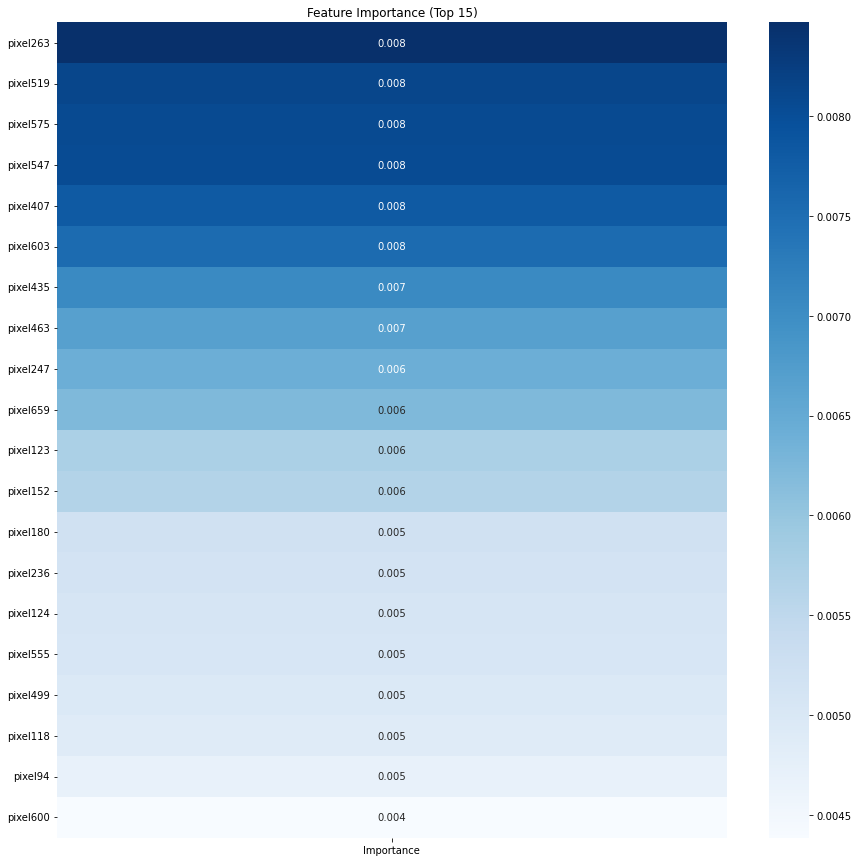

In [15]:
df_feature_importance = pd.DataFrame.from_dict(feature_importance, orient='index', columns=['Importance'])
df_feature_importance = df_feature_importance.sort_values('Importance', ascending=False)

# Selecting top 20 features
top_features = df_feature_importance[:20]


fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(top_features, cmap='Blues', annot=True, fmt='.3f', ax=ax)
plt.title('Feature Importance (Top 15)')
plt.show()

#### Discussion: Feature importance is a measure of the relative importance of each feature or predictor variable in a machine learning model for making accurate predictions. It is a measure of how much each feature contributes to the accuracy and impacts the accuracy of the model. From the heatmap that we generated, we can see the 20 most impactful features for the random forest classifier. Pixel 263 takes the top spot. It means the information contained in pixel 263 impacts the accuracy of the overall  model the most. Feature importance can be used to gain insights into the underlying relationships between the features and the target variable

# Ensemble

In [7]:
'''
We will now create an ensemble model out of the 3 best performing models which are:
Multinomial Logistic Regression (Softmax Regression) with penalty = 'l2' | max_iter = 100 | C = 100.0
SVM with kernel='rbf' | C=100.0 | gamma='scale'
Random Forest Classifier with n_estimators = 100 | max_depth = 20 | min_samples_split = 5
'''

clf_lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', max_iter=100, C=100.0)
clf_svm = SVC(kernel='rbf', C=100.0, gamma='scale', probability=True)
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5)

In [8]:
voting_clf = VotingClassifier(estimators=[('lr', clf_lr), ('svm', clf_svm), ('rf', clf_rf)], voting='soft')
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=100.0,
                                                 multi_class='multinomial')),
                             ('svm', SVC(C=100.0, probability=True)),
                             ('rf',
                              RandomForestClassifier(max_depth=20,
                                                     min_samples_split=5))],
                 voting='soft')

In [13]:
y_pred = voting_clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8861


In [10]:
y_pred_val = voting_clf.predict(x_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Accuracy:", accuracy_val)

Accuracy: 0.8949


#### Discussion: We created an ensemble model using the voting classifier provided by sklearn. A voting classifier is a classifier based on multiple other classifiers. The idea behind voting classifiers is that combining the predictions of multiple classifiers can improve the accuracy and robustness of the overall prediction. Each classifier makes a prediction of its own, and then voting classifier votes to choose out of those predictions. There are generally 2 types of voting:- hard and soft. In hard voting, the final prediction is based on the mode of the predictions of the individual classifiers, while in soft voting, the final prediction is based on the average of the predicted probabilities of the individual classifiers. The ensemble model produces an accuracy of 0.8861 on the test dataset and 0.8949 on the validation dataset, which is greater than any of the accuracies produced by any of the previous classifier models. We can safely say that the ensemble model created outperforms all the other classifier.  